In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Extract File from ZipFile

In [0]:
from zipfile import ZipFile

file_name = "/content/drive/My Drive/Data_Cars and Trucks.zip"
with ZipFile(file_name,'r') as zip:
 zip.extractall()
 print('done')

done


Libraries

In [0]:
import os, cv2
import numpy as np
import tensorflow as tf
from tensorflow.python import keras

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Flatten, AvgPool2D
from keras.layers.convolutional import Conv2D, MaxPooling2D,Conv1D
from keras.optimizers import SGD
from keras.layers import BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array, array_to_img, load_img
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.utils import shuffle

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

Shape of a single image

In [0]:
cv2.imread("/content/Datasets/car/100171.jpg").shape


(333, 500, 3)

In [0]:
PATH = os.getcwd()

In [0]:
PATH

'/content'

In [0]:
PATH = os.path.join(PATH, "Datasets")

In [0]:
PATH

'/content/Datasets'

In [0]:

data_dir_list = os.listdir(PATH)

In [0]:
data_dir_list.remove(".DS_Store")

In [0]:
data_dir_list

['truck', 'car']

In [0]:
#data_dir_list = data_dir_list[:2]

In [0]:
img_data_list = []
classes_names =[]
target_column =[]


In [0]:
for i , dataset in enumerate(data_dir_list):
  classes_names.append(dataset)
  print("{} getting images from {} folder\n".format(i,dataset))
  img_list = os.listdir(PATH + '/'+  dataset)
  try:
    for img in img_list:
      input_img=cv2.imread(PATH+'/'+dataset+'/'+img )
      input_img_resize= cv2.resize(input_img,(64,64))
      #print(input_img.shape)
      #print(input_img_resize.shape)
      img_data_list.append(input_img_resize)
      target_column.append(dataset)
  except:
    print(img)
print(img_data_list[2].shape)

0 getting images from truck folder

1 getting images from car folder

181535.jpg
(64, 64, 3)


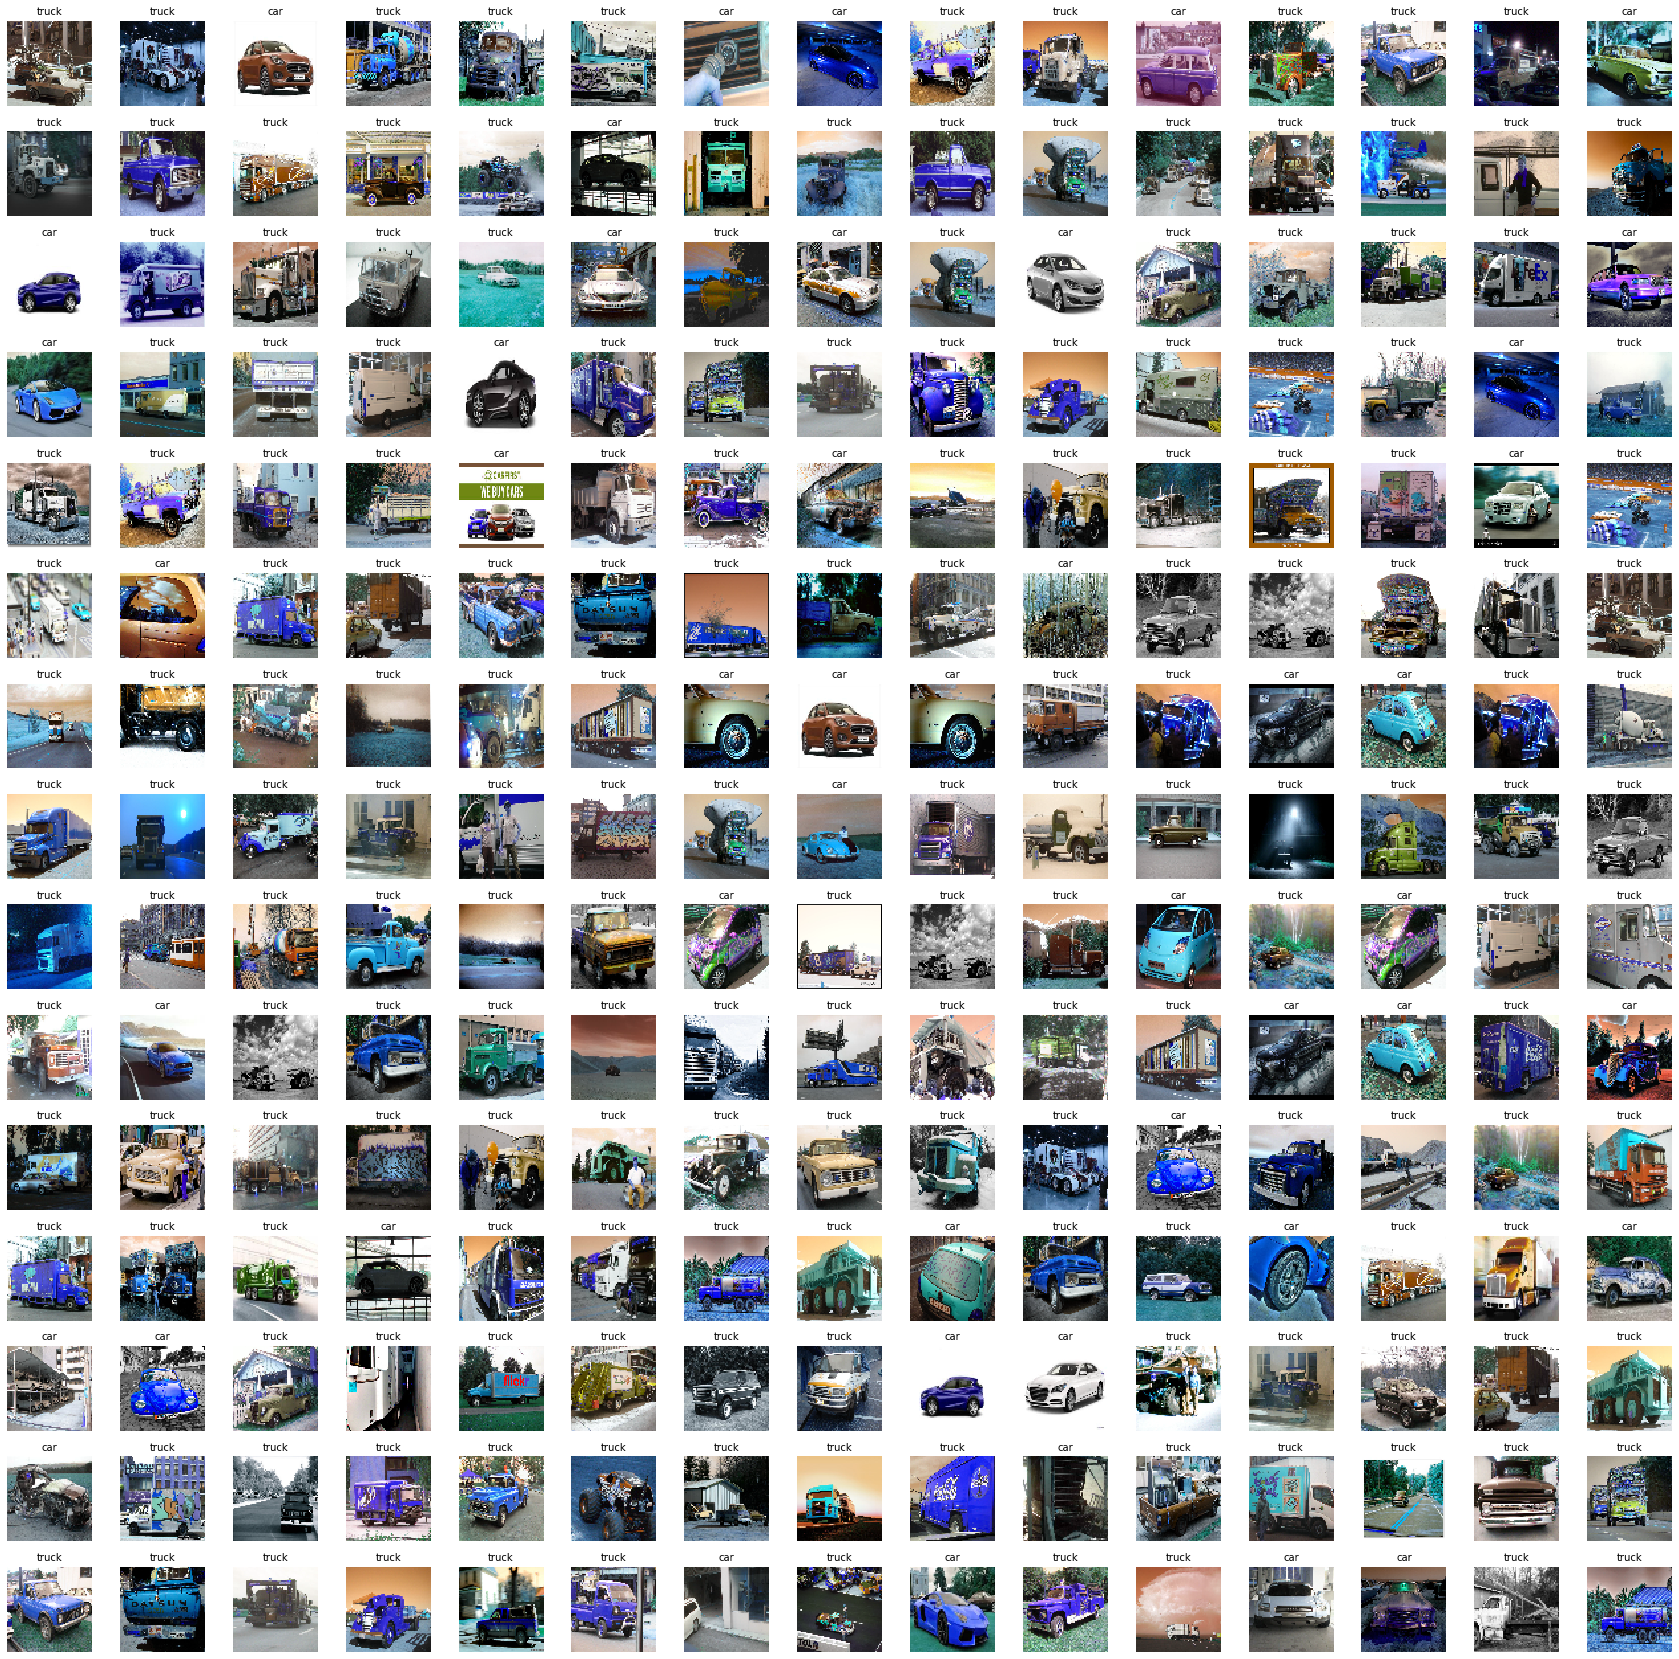

In [0]:
# Define the dimention of the plot grid
w_grid = 15
l_grid = 15

fig, axes = plt.subplots(l_grid, w_grid , figsize = (30,30))

axes=axes.ravel() # flatern the 15 x 15 matrix into 255 array

n_training = len(img_data_list) # get the lenght of the training dataset 

#select a random number from 0 to n_training
for i in np.arange(0, w_grid*l_grid) : # create evenly space variables
    
    # Select a random number 
    index = np.random.randint(0, n_training)
    # read and display the image with the selected index
    axes[i].imshow(img_data_list[index])
    axes[i].set_title(target_column[index], fontsize=10)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.3)


In [0]:
img_data = np.array(img_data_list).astype('float32')

In [0]:
img_data.shape

(504, 64, 64, 3)

In [0]:
len(img_data)

504

In [0]:
img_data

In [0]:
x = img_data
y = le.fit_transform(target_column)


In [0]:
X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2)

In [0]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((403, 64, 64, 3), (403,), (101, 64, 64, 3), (101,))

In [0]:
X_train.shape

(403, 64, 64, 3)

In [0]:
#Reshape the input data by including the color depth 
# X_train = X_train.reshape(-1, 28, 28, 1)
# X_test = X_test.reshape(-1, 28, 28, 1)

In [0]:
###
model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', input_shape = (64, 64, 3)))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = "relu"))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
nb_epoch = 20
batch_size = 32
from keras.preprocessing.image import ImageDataGenerator
X_train = X_train / 255
X_test = X_test / 255

# set train Generator
datagen = ImageDataGenerator(rotation_range=30,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip=True)
#datagen.fit(X_train, y_train)

fitted_model = model.fit_generator(datagen.flow(X_train, y_train, batch_size=batch_size),
                    steps_per_epoch = X_train.shape[0],
                    epochs=nb_epoch,
                    validation_data = (X_test,y_test)
                    )

Epoch 1/20
403/403 [==============================] - 16s 39ms/step - loss: 0.5435 - acc: 0.7726 - val_loss: 0.4567 - val_acc: 0.8317
Epoch 2/20
403/403 [==============================] - 14s 36ms/step - loss: 0.5364 - acc: 0.7750 - val_loss: 0.4657 - val_acc: 0.8317
Epoch 3/20
403/403 [==============================] - 15s 36ms/step - loss: 0.5368 - acc: 0.7739 - val_loss: 0.4758 - val_acc: 0.8317
Epoch 4/20
403/403 [==============================] - 14s 36ms/step - loss: 0.5345 - acc: 0.7755 - val_loss: 0.4606 - val_acc: 0.8317
Epoch 5/20
403/403 [==============================] - 15s 36ms/step - loss: 0.5359 - acc: 0.7744 - val_loss: 0.4681 - val_acc: 0.8317
Epoch 6/20
403/403 [==============================] - 14s 36ms/step - loss: 0.5358 - acc: 0.7742 - val_loss: 0.4617 - val_acc: 0.8317
Epoch 7/20
403/403 [==============================] - 15s 36ms/step - loss: 0.5366 - acc: 0.7732 - val_loss: 0.4636 - val_acc: 0.8317
Epoch 8/20
403/403 [==============================] - 15s 36ms

In [0]:
plt.plot(fitted_model.history['acc'])
plt.plot(fitted_model.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()
